# Analyze A/B Test Results 
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)
- [Final Check](#finalcheck)
- [Submission](#submission)
<a id='intro'></a>
## Introduction
<a id='probability'></a>
## Part I - Probability

In [2]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [3]:
# reading the dataset and asigning the dataframe to the variable df.
df = pd.read_csv("ab_data.csv")
df.head() # viewing the first 5 rows in the dataset to understand its structure.

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
print("The dataset has {} rows.".format(len(df)))

The dataset has 294478 rows.


**c.** The number of unique users in the dataset.

In [5]:
print("There are {} unique users, which means that we have excatly {} repeated users in the dataset.".format(df.user_id.nunique(), df.shape[0]-df.user_id.nunique()))

There are 290584 unique users, which means that we have excatly 3894 repeated users in the dataset.


**d.** The proportion of users converted.

In [6]:
print("{} of all the users have been converted into customers.".format(df.converted.value_counts(normalize=True).at[1]))
print("This connotes to around {}% conversion rate.".format(int(round(df.converted.value_counts(normalize=True).at[1]*100))))

0.11965919355605512 of all the users have been converted into customers.
This connotes to around 12% conversion rate.


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
ttt_mismatchs = len(df[(df.group == "treatment") & (df.landing_page != "new_page")]) # number of treatments mistakenly assigned to "old page"
con_mismatchs = len(df[(df.group == "control") & (df.landing_page != "old_page")]) # number of controls mistakenly assigned to "new page"
print("{} records have unacceptable values for the treatment group.".format(ttt_mismatchs))
print("{} records have unacceptable values for the control group.".format(con_mismatchs))
print("A total of {} unacceptable values recorded for both \"treatment\" and \"control\" groups.".format(ttt_mismatchs + con_mismatchs))

1965 records have unacceptable values for the treatment group.
1928 records have unacceptable values for the control group.
A total of 3893 unacceptable values recorded for both "treatment" and "control" groups.


**f.** Do any of the rows have missing values?

In [8]:
# checking if there is any values missing in any row.
print("AS we can see in the following table there is no missing values in any of the rows in all of the columns:\n{}".format(df.isnull().sum().to_frame(name="Missing Values")))

AS we can see in the following table there is no missing values in any of the rows in all of the columns:
              Missing Values
user_id                    0
timestamp                  0
group                      0
landing_page               0
converted                  0


**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Removing the mismatched rows, and store the result in a new dataframe df2
ttt_match = (df.group == "treatment") & (df.landing_page == "new_page") # first filtering condition (treatment -> new_page)
con_match = (df.group == "control") & (df.landing_page == "old_page") # second filtering condition (control -> old_page)
df2 = df[ttt_match | con_match] # forming and storing the new dataframe in the variable df2

In [10]:
# If the Output is 0 then we can be sure that there are no incorrect rows in df2.
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

<div class="alert alert-success">
And the output is in fact <b>0</b>.<br>Now we are sure that there is <b>no</b> any mismatchs (treatment -> old page or control -> new page) in the the dataframe <mark>df2</mark>
</div>

Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
# checking if there are any user with more than one record.
print("There are {} unique users, which means that we have excatly {} repeated users in the dataset.".format(df2.user_id.nunique(), df2.shape[0]-df2.user_id.nunique()))

There are 290584 unique users, which means that we have excatly 1 repeated users in the dataset.


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
rep_u_id = df2.user_id[df2.duplicated(["user_id"])].iat[0] # assigning the user id in question to the variable rep_u_id.
print("The repeated User ID is {}.".format(rep_u_id))

The repeated User ID is 773192.


**c.** Display the rows for the duplicate **user_id**? 

In [13]:
print("The following records are those of the user with the ID {}:".format(rep_u_id))
df2[df2.duplicated(["user_id"], keep = False)] # filtering to show the duplicates and showing both of them thats why keep is False.

The following records are those of the user with the ID 773192:


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Removing the first row with a duplicate user_id
df2 = df2.drop_duplicates(["user_id"])
# Making sure that the row with a duplicate user_id is deleted and there is no any duplicated Users Ids.
print("Now after removing one of the entries of the user {} there are {} unique users remaining, which means that now we have excatly {} repeated users in the dataset.".format(rep_u_id, df2.user_id.nunique(), df2.shape[0]-df2.user_id.nunique()))

Now after removing one of the entries of the user 773192 there are 290584 unique users remaining, which means that now we have excatly 0 repeated users in the dataset.


**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

This total probability is in fact calculated this way:
\begin{equation*}
P(conversion)= P(converted|control)P(control) + P(converted|treatment)P(treatment)
\end{equation*}
But we don't need to calculate it because we can get it as the mean of the converted because the records are binary.

In [15]:
# This is the total probability of conversion
p_population = df2.converted.mean() # naming the variable p_population because it is a parameter as it is describling the full population.
print("The total conversion probability is {}.".format(p_population))
print("Around {}% of the visitors converts regardless of the landing page they receive.".format(round(p_population*100, 2)))

The total conversion probability is 0.11959708724499628.
Around 11.96% of the visitors converts regardless of the landing page they receive.


**b.** Given that an individual was in the `control` group, what is the probability they converted?

\begin{equation*}
P(converted|control) = {P(converted \cap control) \over P(control)}
\end{equation*}

In [16]:
cv_con = df2[(df2.group == "control") & (df2.converted == 1)].shape[0]/df2[df2.group == "control"].shape[0]
print("The propability of converting given being in the control group is {}.".format(cv_con))
print("Around {}% of the visitors in the control group converts.".format(round(cv_con*100)))

The propability of converting given being in the control group is 0.1203863045004612.
Around 12% of the visitors in the control group converts.


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

\begin{equation*}
P(converted|treatment) = {P(converted \cap treatment) \over P(treatment)}
\end{equation*}

In [17]:
cv_ttt = df2[(df2.group == "treatment") & (df2.converted == 1)].shape[0]/df2[df2.group == "treatment"].shape[0]
print("The propability of converting given being in the treatment group is {}.".format(cv_ttt))
print("Around {}% of the visitors in the treatment group converts.".format(round(cv_ttt*100, 2)))

The propability of converting given being in the treatment group is 0.11880806551510564.
Around 11.88% of the visitors in the treatment group converts.


Finding the actual diffrence:

In [18]:
obs_diff = cv_ttt - cv_con # Assiging the actual difference between the two conversion rates to the variable obs_diff.
print("The actual diffrence between the treatment and the control conversion rates is {}.".format(obs_diff))

The actual diffrence between the treatment and the control conversion rates is -0.0015782389853555567.


**d.** What is the probability that an individual received the new page?

In [19]:
p_np = df2[df2.landing_page == "new_page"].shape[0]/df2.shape[0] # assigning total propability of receiving the new page to p_np
print("The total propability of receiving the new page is {}.".format(p_np))
print("Each user have a {}% chance of receiving the new page and being in the treatment group.".format(round(p_np*100)))

The total propability of receiving the new page is 0.5000619442226688.
Each user have a 50% chance of receiving the new page and being in the treatment group.


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

<div class="alert alert-success">
Judging by the outcomes above we can't see any evidence that might suggests that users in the treatment group with the new landing page show more conversions than the others in the control group, as the actual difference in the conversion rate between the control and treatment groups is <b>absolutely negligible</b>. Also when checking the fairness and the unbiased sorting of the users to both groups and to avoid <b>"Simpson's Paradox"</b> it was found that each user has a fair balanced chance to receive either pages and being in either groups. That said, we cannot be certain yet that the new page is better or worst than or even exactly as the old page in terms of conversion rate maybe exprementing for a longer period of time would shift the findings in favor of one of the two pages.
</div>

<a id='ab_test'></a>
## Part II - A/B Test

<div class="alert alert-info">
\begin{equation*}
H_0 :  P_{old} \geq P_{new}
\\
H_1 : P_{new} > P_{old}
\\
or
\\
H_0 : P_{new} - P_{old} \leq 0
\\
H_1 : P_{new} - P_{old} > 0
\end{equation*}
</div>

### 2.2 - Null Hypothesis $H_0$ Testing


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [20]:
p_new = p_population
print("The conversion rate of the new page under the null hypothesis is {}.".format(p_new))

The conversion rate of the new page under the null hypothesis is 0.11959708724499628.


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [21]:
p_old = p_population
print("The conversion rate of the new page under the null hypothesis is {}.".format(p_old))

The conversion rate of the new page under the null hypothesis is 0.11959708724499628.


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [22]:
n_new = df2[df2.group == "treatment"].shape[0]
print("The number of users in the treatment group are {}.".format(n_new))

The number of users in the treatment group are 145310.


**d.** What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2[df2.group == "control"].shape[0]
print("The number of users in the control group are {}.".format(n_old))

The number of users in the control group are 145274.


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br>
Store these $n_{new}$ 1's and 0's in the `sample_ttt` numpy array.<br>

In [24]:
# Simulate a Sample for the treatment Group
sample_ttt = np.random.choice([0,1], n_new, [1-p_new, p_new])
p_s_new = sample_ttt.mean() # probability of the simulated treatment sample
print("The propability of the simulated treatment sample is {}.".format(p_s_new))

The propability of the simulated treatment sample is 0.4993462253114032.


**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `sample_con` numpy array.

In [25]:
# Simulate a Sample for the control Group
sample_con = np.random.choice([0,1], n_old, [1-p_old, p_old])
p_s_old = sample_con.mean()
print("The propability of the simulated control sample is {}.".format(p_s_old))

The propability of the simulated control sample is 0.49818274433140136.


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [26]:
sim_diff = p_s_new - p_s_old
print("The diffrence in the conversion propability of the simulated samples (treatment and control) is {}.".format(sim_diff))

The diffrence in the conversion propability of the simulated samples (treatment and control) is 0.001163480980001852.



**h. Sampling distribution** <br>
Re-create `sample_ttt` and `sample_con` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [27]:
# Sampling distribution 
p_diffs = []
for _ in range(int(1e4)):
    sample_ttt = np.random.choice([0,1], n_new, [1-p_new, p_new])
    sample_con = np.random.choice([0,1], n_old, [1-p_old, p_old])
    p_diffs.append(sample_ttt.mean() - sample_con.mean())

In [28]:
p_diffs = np.array(p_diffs) # transforming p_diffs structure to an array instead of a list

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?<br>
Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.

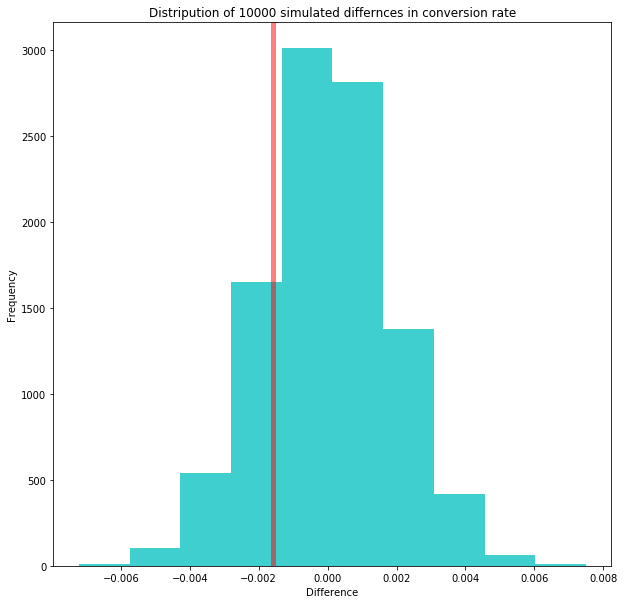

In [29]:
plt.figure(figsize=(10,10))
plt.hist(p_diffs, color = "c", alpha = 0.75)
plt.title("Distripution of 10000 simulated differnces in conversion rate")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.axvline(x=obs_diff, c ="r", lw = 5, alpha = 0.5);

<font color="green"><b>Yes!</b></font>, the plot looks like what I have expected.

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
print("The p-value is {}.".format((p_diffs > obs_diff).mean()))

The p-value is 0.8073.


**k.** Please explain in words what you have just computed in part **j** above.

<div class="alert alert-success">
- Scientifically this value is called the $P_{value}$.<br>
- When the $P_{value}$ is compared with the <b>Type I error rate</b> ($\alpha$) suggests which hypothesis to be accepted and which to be rejected.<br>
- So If $H_0$ is true, the probablity of obtaining the observed statistic or an etreme value in favour of the $H_1$. <br>
- As in our case the $P_{value}$ is significantly higher than $\alpha: \alpha = 0.05$ being the error rate this suggests that we cannot reject the null hypothesis or accept the alternative hypothesis. This means that $H_0$ remains valid and the $P_{new} - P_{old} \leq 0$.
<div>



**l. Using Built-in Methods for Hypothesis Testing**<br>

In [31]:
# number of conversions with the old_page
convert_old = df2[(df2.landing_page == "old_page") & (df2.converted == 1)].shape[0]

# number of conversions with the new_page
convert_new = df2[(df2.landing_page == "new_page") & (df2.converted == 1)].shape[0]

# number of individuals who were shown the old_page
n_old = df2[df2.landing_page == "old_page"].shape[0]

# number of individuals who received new_page
n_new = df2[df2.landing_page == "new_page"].shape[0]

print("The number of conversions resulted from the old page are {} conversions, while those resulted from the new page are {} conversions. On the other hand the number of users landed on the old page are {} users, while those who landed on the new page are {} users.".format(convert_old, convert_new, n_old, n_new))

The number of conversions resulted from the old page are 17489 conversions, while those resulted from the new page are 17264 conversions. On the other hand the number of users landed on the old page are 145274 users, while those who landed on the new page are 145310 users.


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
print("The Z score is {} and P value is {}".format(z_score, p_value))

The Z score is 1.3109241984234394 and P value is 0.09494168724097551


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

<div class="alert alert-success">
-The $P_{value}$ calculated using the <b>statsmodels.api.stats.proportions_ztest</b> method agrees with previous approach where the calculated $P_{value} > \alpha$. This means that there is no significant evidence enough to reject the $H_0$.

-The $Z_{score}$ calculated using the <b>statsmodels.api.stats.proportions_ztest</b> method as a <u><b>right-tailed test</b></u> is smaller than $Z_\alpha$ which also mean that we cannot reject the $H_0$.

</div>

<a id='regression'></a>
### Part III - A regression approach
**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

<div style="background:#dff0d8">

- [ ] Linear Regression
- [x] <font color='green'><b>Logistic Regression</b></font>
- [ ] Polynomial Regression
- [ ] Support Vector Regression
- [ ] Decision Tree Regression
- [ ] Random Forest Regression
- [ ] Ridge Regression
- [ ] Lasso Regression
</div>


**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:

In [33]:
df2["intercept"] = df2.get("intercept", 1)
df2["ab_page"] = pd.get_dummies(df2['group'])["treatment"]

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [34]:
lr_model = sm.Logit(df2.converted, df2[["intercept", "ab_page"]])
result = lr_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-22 05:47 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [36]:
1/np.exp(result.params).to_frame("")[1:]

,
ab_page,1.015102


In [37]:
print("The appropriate conversion coefficient for the users using the new landing page is {}.".format(round(1/np.exp(result.params).to_frame().iat[1,0],3)))

The appropriate conversion coefficient for the users using the new landing page is 1.015.


**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

<div class="alert alert-success">
    <table style="width:50%">
        <tr><th style="text-align:center">$_{Hypothesis}\ ^{Approach}$</th><th style="text-align:center">A/B Testing</th><th style="text-align:center">Regression</th></tr>
        <tr><td style="text-align:center">Null Hypothesis</td><td style="text-align:center">$P_{old}\geq P_{new}$</td><td style="text-align:center">$P_{old}=P_{new}$</td></tr>
    </table>
<br>
    <h4>Hypothesis for A/B testing:</h4>
    <p>(This Hypothesis is one-sided because it assumes one side is greater that the other side)</p>
    <br>
\begin{equation*}
H_0 :  P_{old} \geq P_{new}
\\
H_1 : P_{new} > P_{old}
\\
or
\\
H_0 : P_{new} - P_{old} \leq 0
\\
H_1 : P_{new} - P_{old} > 0
\end{equation*}
    <h4>Hypothesis for the logistic regression:</h4>
    <p>(This Hypothesis is two-sided because it assumes equality)</p>
    <br>
\begin{equation*}
H_0 :  P_{old} = P_{new}
\\
H_1 : P_{new} \neq P_{old}
\\
or
\\
H_0 : P_{new} - P_{old} = 0
\\
H_1 : P_{new} - P_{old} \neq 0
\end{equation*}
<br>
<p>From the summary of the results we can see that the current $P_{value}$ of the ab_page is <strong>0.1899</strong> so when we compare it with the <b>Type I error rate</b> $\alpha$ we can see that the $P_{value} > \alpha$ this confirms the notion of not rejecting the $H_0$.</p><br>
    <p><mark>Practical Interpretation:</mark> Since the variable ab_page holds binary values that represent landing on either the new or the old page, this current $P_{value}$ indicates that the page type has no significant effect on whether a user converts to a customer or not . This finding are lined up with our earlier reports that there are <strong>no significant differnce</strong> between the old and new pages' conversion rate.</p>
</div>

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<div class="alert alert-success">
To be fair nothing in real life depend entirely on only one factor thus we in building our model cannot possbily rely on the Landing Page variable alone. The idea of adding additional information about users could reveal hidden values of the new or the old page for specific group of the users. So, <b>yes</b>. It would be a great idea to think of other factors that might influence a user to convert into a customer perhaps even regardless of the Landing Page as it will provide us with more data that can be analyzed and might show statistical significance so it can be used then to predict conversions. Those other factors that might have an influence on our study might be any of those examples:<br><font color='grey'><u>The duration of browsing</u></font>, <font color='grey'><u>Geo-location</u></font>, <font color='grey'><u>Nationality</u></font>, <font color='grey'><u>Social status</u></font>, <font color='grey'><u>Gender</u></font> or <font color='grey'><u>Age</u></font>.<br> Exploring some of these and checking if they can help enhance our logistic regression model might be worth it. But we have to always remember that <b>correlation is not causation</b>. Also it is important to pay attention to the presence of multicollinearity amongst predictor variables in addtion to that we have to know that adding too many irrelevant factors will indeed lead to an increase in the variance and that would make the model way <b>more complex</b> than required and may lead to problems like <b>overfitting</b> the model which always leads to <b>false inferening and predicting</b>.
<div>

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in.

In [38]:
# Read the countries.csv
df_con = pd.read_csv("countries.csv")
df_con.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
if len(df_con) == len(df2): # checking if the two datasets are of the same length (number of rows)
    print("Yes, the two datasets to be joined have the same number of rows.")
else:
    print("No, the two datasets doesn't have the same number of rows./nPlease, check them before continuing!")

Yes, the two datasets to be joined have the same number of rows.


In [40]:
print("The df_con dataset has {} duplicated users".format(df_con[df_con.duplicated(["user_id"])].shape[0])) # looking for any duplicates users

The df_con dataset has 0 duplicated users


Now we can be sure that the two datasets should fit together fine with no need to specify the type of the join to be inner.

In [41]:
# Join with the df2 dataframe
merged_df = df2.join(df_con.set_index("user_id"), on="user_id")
merged_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [42]:
# Creating the necessary dummy variables
merged_df[['ca', 'uk', 'us']] = pd.get_dummies(merged_df['country'])
merged_df.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ca,uk,us
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [43]:
# building a model testing conversion for the counrties US and CA
lr_model1 = sm.Logit(merged_df.converted, merged_df[["intercept", "us", "ca"]])
result1 = lr_model1.fit()
result1.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-22 05:47 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
us           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
ca           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

In [44]:
1/np.exp(result1.params).to_frame("")[1:]

,
us,1.009966
ca,1.052027


In [45]:
print("The appropriate conversion coefficient for the users living in the United States is {}.".format(round(1/np.exp(result1.params).to_frame().iat[1,0],5)))
print("The appropriate conversion coefficient for the users living in the Canada is {}.".format(round(1/np.exp(result1.params).to_frame().iat[2,0],4)))

The appropriate conversion coefficient for the users living in the United States is 1.00997.
The appropriate conversion coefficient for the users living in the Canada is 1.052.


<div class="alert alert-success">
    <h4>From the summary above we can interpret the following:</h4><br>
    
    
<br>
<mark>Statistical Interpretation:</mark><br>
    
- All $P_{values}$ are greater that the <b>Type I error rate</b> $\alpha$ this confirms the notion of <b>not</b> rejecting the $H_0$.</p><br>

<br>
<mark>Practical Interpretation:</mark><br>

- Users living in United Kingdom are <b>1.009966</b> more likely to convert into customers than users living in the United States while holding all other variables constant.

- Users living in United Kingdom are <b>1.052027</b> more likely to convert into customers than users living in the Canada while holding all other variables constant.
</div>

In [46]:
# building a model taking in account the countries with no interaction term 
lr_model2 = sm.Logit(merged_df.converted, merged_df[["intercept", "ab_page", "us", "ca"]])
result2 = lr_model2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-22 05:48 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
us           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
ca           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

In [47]:
1/np.exp(result2.params).to_frame("")[1:]

,
ab_page,1.015056
us,1.009932
ca,1.051944


In [48]:
print("The appropriate conversion coefficient for the users living in the United States and is {}.".format(round(1/np.exp(result2.params).to_frame().iat[2,0],4)))
print("The appropriate conversion coefficient for the users living in the Canada is {}.".format(round(1/np.exp(result2.params).to_frame().iat[3,0],4)))

The appropriate conversion coefficient for the users living in the United States and is 1.0099.
The appropriate conversion coefficient for the users living in the Canada is 1.0519.


<div class="alert alert-success">
    <h4>From the summary above we can interpret the following:</h4><br>
    
    
<br>
<mark>Statistical Interpretation:</mark><br>
    
- All $P_{values}$ are greater that the <b>Type I error rate</b> $\alpha$ this confirms the notion of <b>not</b> rejecting the $H_0$.</p><br>

<br>
<mark>Practical Interpretation:</mark><br>

- Users living in United Kingdom are <b>1.009932</b> more likely to convert into customers than users living in the United States and <u>landing on the new page</u> while holding all other variables constant.

- Users living in United Kingdom are <b>1.051944</b> more likely to convert into customers than users living in the Canada and <u>landing on the new page</u> while holding all other variables constant.
</div>

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.<br>

In [49]:
# Fit your model, and summarize the results
merged_df["us_ab_page"] = merged_df.us * merged_df.ab_page
merged_df["uk_ab_page"] = merged_df.uk * merged_df.ab_page
merged_df["ca_ab_page"] = merged_df.ca * merged_df.ab_page
merged_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ca,uk,us,us_ab_page,uk_ab_page,ca_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [50]:
lr_model3 = sm.Logit(merged_df["converted"], merged_df[["intercept", "ab_page", "us", "ca", "us_ab_page", "ca_ab_page"]])
result3 = lr_model3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-22 05:48 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
us            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
ca           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
us_ab_page   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
ca_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

In [51]:
1/np.exp(result3.params).to_frame("")[1:]

,
ab_page,0.989224
us,0.994272
ca,1.011854
us_ab_page,1.031896
ca_ab_page,1.081428


In [52]:
print("The appropriate conversion coefficient for the users living in the United States and using the new landing page is {}.".format(round(1/np.exp(result3.params).to_frame().iat[4,0],3)))
print("The appropriate conversion coefficient for the users living in the Canada and using the new landing page is {}.".format(round(1/np.exp(result3.params).to_frame().iat[5,0],3)))

The appropriate conversion coefficient for the users living in the United States and using the new landing page is 1.032.
The appropriate conversion coefficient for the users living in the Canada and using the new landing page is 1.081.


<div class="alert alert-success">
    <h4>From the summary above we can interpret the following:</h4><br>
    
    
<br>
<mark>Statistical Interpretation:</mark><br>
    
- All $P_{values}$ are greater that the <b>Type I error rate</b> $\alpha$ this confirms the notion of <b>not</b> rejecting the $H_0$.</p><br>

<br>
<mark>Practical Interpretation:</mark><br>

- Users living in United Kingdom and <u>using on the new page</u> are <b>1.031896</b> more likely to convert into customers than users living in the United States and <u>using on the new page</u> while holding all other variables constant.

- Users living in United Kingdom and <u>using on the new page</u> are <b>1.081428</b> more likely to convert into customers than users living in the Canada and <u>landing on the new page</u> while holding all other variables constant.
<br>

<h4>Knowing that we can conclude:</h4><br>

Including the countries as variable in the model enforces our previous findings that there is no statistical significance enough to reject our null hypothesis $H_0$.
</div>

<a id='conclusion'></a>
## Conclusion

<div class="alert alert-success">
    <h4>Through out this research we have used three diffrent approaches:</h4><br>

- Propability
- A/B Null Hypothesis $H_0$ Testing
- Regression
    
<p>Here is the findings of the used approaches:</p>
<table style="width:50%">
        <tr><th style="text-align:center"></th><th style="text-align:center">Propability</th><th style="text-align:center">A/B Testing</th><th style="text-align:center">Regression</th></tr>    
        <tr><td style="text-align:center">$P_{value}$</td><th style="text-align:center">-</th><td style="text-align:center">Not Significant</td><td style="text-align:center">Not Significant</td></tr>
        <tr><td style="text-align:center">$Z_{score}$</td><th style="text-align:center">-</th><td style="text-align:center">$H_{0}$ Not Rejected</td><td style="text-align:center">-</td></tr>
        <tr><td style="text-align:center">Null Hypothesis $H_{0}$</td><th style="text-align:center;font-weight:normal">Not Rejected</th><td style="text-align:center">Not Rejected</td><td style="text-align:center">Not Rejected</td></tr>
    <tr><td style="text-align:center">Alternative $H_{1}$</td><th style="text-align:center;font-weight:normal">Rejected</th><td style="text-align:center">Rejected</td><td style="text-align:center">Rejected</td></tr>
    </table>    
<br>
<mark>Statistical Interpretation:</mark><br>
    
- In all of the experiments all of the $P_{values}$ were greater that the <b>Type I error rate</b> $\alpha$ this confirms the notion of <b>not</b> rejecting the $H_0$.</p><br>

<br>
<mark>Practical Interpretation:</mark><br>

- The users' conversion rate is not affected at all by the new landing page or the country they resides in.


<h4>Conclution:</h4><br>

- There is no statistical significance enough to reject our null hypothesis $H_0$.
- We cannot reject or fail the null hypothesis $H_0$.

<h4>Recomendations:</h4><br>
<b><u>Option 1:</u></b><br>
 If it is cost efficient the experiments should keep running as having larger data might shift the results.
<br><b><u>Option 2:</u></b><br>
 Stop running the new landing page as it does not increase the conversion rate.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0